In [31]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import collections
import seaborn as sns       # package for better viewing of networks
import operator 

In [32]:
from NetworkBuilding import build_network_from_excel, build_network_from_df

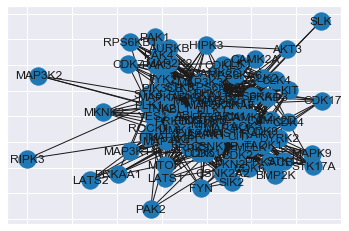

In [33]:
G_kinaseNetwork = build_network_from_excel(file_path = "/Users/iris/Documents/QMUL-2018/Individual_Project/coding/datasets/mcf7_ntera2_hl60_ksea.xlsm",key="NTERA2", sheet_name = "zScorenodes.edges", threshold = 0.2)
G_kinaseNetwork

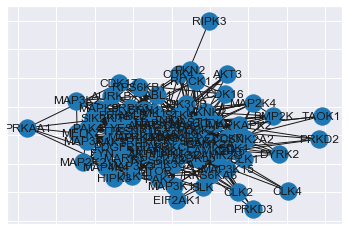

{'SLK': 1.0, 'RIPK3': 1.0, 'MAP3K11': 0.9090909090909091, 'LATS2': 0.8333333333333334, 'RPS6KB1': 0.8333333333333334, 'CLK1': 0.7908496732026143, 'CLK4': 0.7647058823529411, 'CLK2': 0.7602339181286549, 'MAPK9': 0.7142857142857143, 'PRKAA1': 0.7}


In [36]:
# Function to Find Top Results 
def get_top_keys(cc_list, top):
    #items = dictionary.items()
    cc_list = sorted(cc_list, reverse=True, key=lambda x: x[1])
    return {x[0]:x[1] for x in cc_list[:top]}

# Function to get top clustering coefficient
def top_clus_coeff(cell_line):
    #build network
    G_kinaseNetwork = build_network_from_excel(file_path = "/Users/iris/Documents/QMUL-2018/Individual_Project/coding/datasets/mcf7_ntera2_hl60_ksea.xlsm",key="HL60", sheet_name = "zScorenodes.edges", threshold = 0.2)

    # Clustering Coefficient
    G_kinaseNetwork_clus_coeff = nx.clustering(G_kinaseNetwork)
    
    # Sort Results
    sorted_cc = sorted(cc.items(), key=operator.itemgetter(1))

    # Get Top Results 
    top_clus_coeff = get_top_keys(sorted_cc,10)
    print(top_clus_coeff)
    
    # Save to dataframes
    top_clus_coeff_df = pd.DataFrame.from_dict(top_clus_coeff,orient="index",columns=["Clustering Coefficient"]).reset_index(level=0)

    #Save to files
    top_clus_coeff_df.to_csv("/Users/iris/Documents/QMUL-2018/Individual_Project/coding/analysis_results/{}_top_clus_coeff.csv".format(cell_line),header=None)
    
    return {"clustering coefficient":top_clus_coeff_df}

#change cell lines here
HL60_clus_coeff = top_clus_coeff("HL60")

{'HL60_top_clus_coeff': '/Users/iris/Documents/QMUL-2018/Individual_Project/coding/analysis_results/HL60_top_clus_coeff.csv'}


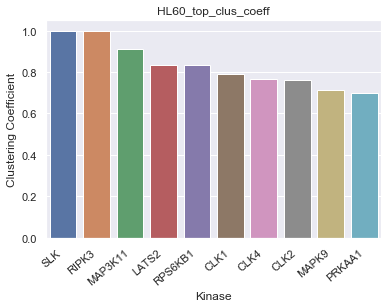

In [37]:
# Specify the result files and draw plots
data_folder='/Users/iris/Documents/QMUL-2018/Individual_Project/coding/analysis_results'
csv_files={ file.split('.')[0]:os.path.join(data_folder,file) for file in os.listdir(data_folder) if file.startswith("HL60_top_clus_coeff.csv")}    # Specify the results to be plot
sns.set(style="darkgrid")
print (csv_files)

df = dict()

for name,path in csv_files.items():
    df[name]=pd.read_csv(path,header=None,names=["Kinase","Clustering Coefficient"])
    df[name]
    bar_plot=sns.barplot(x="Kinase",y="Clustering Coefficient",
                data=df[name].sort_values(by="Clustering Coefficient",
                                          ascending=False).head(10))
    bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=40, ha="right")
    bar_plot.set_title(name)
    
    plt.savefig(data_folder+"{}.png".format(name))
    plt.show()
